<a href="https://colab.research.google.com/github/DivyaCodingWorld/Amazon.Clone/blob/main/Blood_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

In [11]:
import os
import zipfile
from pathlib import Path

# 1. Define paths
zip_path = Path('/content/dataset_blood_group.zip')
extract_path = Path('/content/dataset_blood_group')

# 2. Check if ZIP exists
if not zip_path.exists():
    print(f"Error: ZIP file not found at {zip_path}")
    print("Please upload your dataset first using:")
    print("from google.colab import files")
    print("uploaded = files.upload()")
else:
    # 3. Create extraction directory
    extract_path.mkdir(exist_ok=True)

    # 4. Extract the archive
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    # 5. Verify extraction
    print(f"Extracted to: {extract_path}")
    print("Root contents:", os.listdir(extract_path))

    # 6. Show blood group folders
    blood_groups = [d for d in os.listdir(extract_path) if os.path.isdir(extract_path/d)]
    print("\nBlood groups found:", blood_groups)

    # 7. Show sample files from first group
    if blood_groups:
        sample_group = extract_path/blood_groups[0]
        print(f"\nSample files from {blood_groups[0]}:")
        print(os.listdir(sample_group)[:8])  # First 5 files



Extracted to: /content/dataset_blood_group
Root contents: ['dataset_blood_group']

Blood groups found: ['dataset_blood_group']

Sample files from dataset_blood_group:
['O+', 'A+', 'O-', 'B+', 'A-', 'AB+', 'B-', 'AB-']


In [12]:
import os
import pandas as pd
from pathlib import Path
from collections import Counter

# 1. Define your dataset path
dataset_path = Path('dataset_blood_group')

# 2. Get all image paths with proper path handling
filepaths = []
labels = []

for root, _, files in os.walk(dataset_path):
    if not files:  # Skip empty directories
        continue

    # Extract blood group from folder name
    blood_group = os.path.basename(root)

    for file in files:
        if file.lower().endswith(('.bmp', '.jpg', '.png')):  # Filter image files
            filepaths.append(os.path.join(root, file))
            labels.append(blood_group)

# 3. Create DataFrame
df = pd.DataFrame({
    'filepath': filepaths,
    'blood_group': labels
})

# 4. Verify dataset
print(f"Total samples: {len(df)}")
print("Class distribution:")
print(df['blood_group'].value_counts())

# 5. Check samples from each group
print("\nSample files:")
for group in df['blood_group'].unique():
    samples = df[df['blood_group'] == group]['filepath'].head(2)
    print(f"\n{group}:")
    print(samples.tolist())

Total samples: 6000
Class distribution:
blood_group
A-     1009
O+      852
AB-     761
B-      741
O-      712
AB+     708
B+      652
A+      565
Name: count, dtype: int64

Sample files:

O+:
['dataset_blood_group/dataset_blood_group/O+/cluster_6_1991.BMP', 'dataset_blood_group/dataset_blood_group/O+/cluster_6_5093.BMP']

A+:
['dataset_blood_group/dataset_blood_group/A+/cluster_0_5918.BMP', 'dataset_blood_group/dataset_blood_group/A+/cluster_0_3750.BMP']

O-:
['dataset_blood_group/dataset_blood_group/O-/cluster_7_5304.BMP', 'dataset_blood_group/dataset_blood_group/O-/cluster_7_5150.BMP']

B+:
['dataset_blood_group/dataset_blood_group/B+/cluster_2_419.BMP', 'dataset_blood_group/dataset_blood_group/B+/cluster_2_1786.BMP']

A-:
['dataset_blood_group/dataset_blood_group/A-/cluster_1_2214.BMP', 'dataset_blood_group/dataset_blood_group/A-/cluster_1_2879.BMP']

AB+:
['dataset_blood_group/dataset_blood_group/AB+/cluster_4_313.BMP', 'dataset_blood_group/dataset_blood_group/AB+/cluster_4_196.B

                                            Filepath Label
0  dataset_blood_group/dataset_blood_group/A-/clu...    A-
1  dataset_blood_group/dataset_blood_group/O-/clu...    O-
2  dataset_blood_group/dataset_blood_group/O-/clu...    O-
3  dataset_blood_group/dataset_blood_group/B+/clu...    B+
4  dataset_blood_group/dataset_blood_group/AB+/cl...   AB+


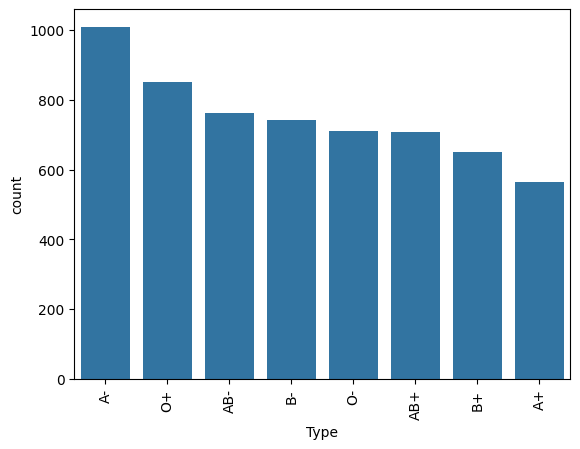

In [13]:
# Create a DataFrame with file paths and labels
filepath = pd.Series(filepaths, name='Filepath').astype(str)
Labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, Labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
print(data.head(5))

# Visualize class distribution
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)
plt.show()

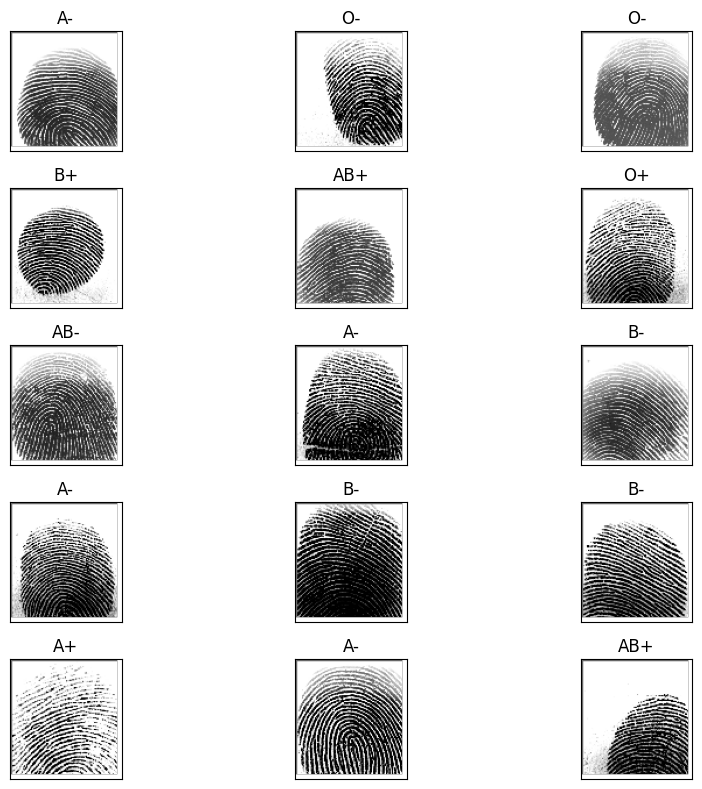

In [14]:
# Split data into training and testing sets
train, test = train_test_split(data, test_size=0.20, random_state=42)

# Visualize some images from the dataset
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [17]:
# Set up ImageDataGenerator for training and validation data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 4800 validated image filenames belonging to 8 classes.
Found 1200 validated image filenames belonging to 8 classes.


In [ ]:
# Define the base pre-trained model
pretrained_model = ResNet50(
    input_shape=(256, 256, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

# Add layers for classification on top of ResNet50
x = Dense(128, activation="relu")(pretrained_model.output)
x = Dense(128, activation="relu")(x)
outputs = Dense(8, activation='softmax')(x)

model = Model(inputs=pretrained_model.input, outputs=outputs)

model.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=20,
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 1280s 8s/step - accuracy: 0.4087 - loss: 1.5526 - val_accuracy: 0.6225 - val_loss: 0.9439
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1244s 8s/step - accuracy: 0.6748 - loss: 0.8313 - val_accuracy: 0.7183 - val_loss: 0.7180
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1223s 8s/step - accuracy: 0.7501 - loss: 0.6465 - val_accuracy: 0.6825 - val_loss: 0.7582
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1231s 8s/step - accuracy: 0.7946 - loss: 0.5307 - val_accuracy: 0.7350 - val_loss: 0.6394
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1239s 8s/step - accuracy: 0.8102 - loss: 0.4962 - val_accuracy: 0.7483 - val_loss: 0.6339
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1216s 8s/step - accuracy: 0.8317 - loss: 0.4083 - val_accuracy: 0.7525 - val_loss: 0.5736
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1227s 8s/step - accuracy: 0.8562 - loss: 0.3692 - val_accuracy: 0.7750 - val_loss: 0.5998
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1211s 8s/step - accuracy: 0.8743 - loss: 0.3198 - val_accurac

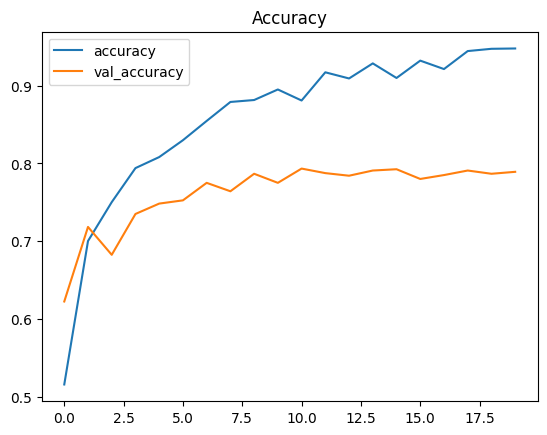

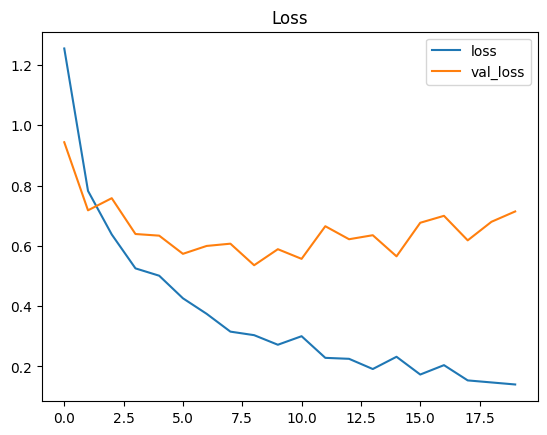

Test Loss: 0.71424
Test Accuracy: 78.92%
38/38 ━━━━━━━━━━━━━━━━━━━━ 241s 6s/step
              precision    recall  f1-score   support

          A+       0.81      0.84      0.83       114
          A-       0.89      0.60      0.72       188
         AB+       0.71      0.94      0.81       142
         AB-       0.73      0.81      0.76       149
          B+       0.83      0.82      0.83       139
          B-       0.95      0.84      0.89       149
          O+       0.71      0.80      0.75       173
          O-       0.78      0.73      0.76       146

    accuracy                           0.79      1200
   macro avg       0.80      0.80      0.79      1200
weighted avg       0.80      0.79      0.79      1200



In [23]:
# Plot training history: accuracy
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

# Plot training history: loss
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

# Evaluate the model on test data
results = model.evaluate(valid_gen, verbose=0)
print(f"Test Loss: {results[0]:.5f}")
print(f"Test Accuracy: {results[1]*100:.2f}%")

# Predict labels for test data
pred = model.predict(valid_gen)
pred = np.argmax(pred, axis=1)

# Map predicted labels
labels = train_gen.class_indices
labels = dict((v, k) for k, v in labels.items())
pred = [labels[k] for k in pred]

# Compare predicted labels with true labels and print classification report
y_test = list(test.Label)
print(classification_report(y_test, pred))

In [32]:
model.save("/content/model_blood_group_detection.h5")

In [24]:
train_gen.class_indices

{'A+': 0, 'A-': 1, 'AB+': 2, 'AB-': 3, 'B+': 4, 'B-': 5, 'O+': 6, 'O-': 7}

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


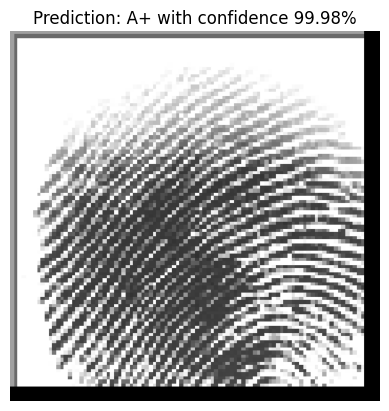

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Load the pre-trained model
model = load_model('/content/model_blood_group_detection.h5')

# Define the class labels
labels = {'A+': 0, 'A-': 1, 'AB+': 2, 'AB-': 3, 'B+': 4, 'B-': 5, 'O+': 6, 'O-': 7}
labels = dict((v, k) for k, v in labels.items())

# Example of loading a single image and making a prediction
img_path = 'dataset_blood_group/dataset_blood_group/A+/cluster_0_5918.BMP'
img_path ='dataset_blood_group/dataset_blood_group/A+/cluster_0_3750.BMP'

img = image.load_img(img_path, target_size=(256, 256))  # Load the image
x = image.img_to_array(img)  # Convert image to array
x = np.expand_dims(x, axis=0)  # Expand dimensions to match the model input
x = preprocess_input(x)  # Preprocess the image

result = model.predict(x)  # Predict using the model
predicted_class = np.argmax(result)  # Get the predicted class index

# Map the predicted class to the label
predicted_label = labels[predicted_class]
confidence = result[0][predicted_class] * 100  # Confidence level

# Display the image
plt.imshow(image.array_to_img(image.img_to_array(img) / 255.0))
plt.axis('off')  # Hide axes

# Display the prediction and confidence below the image
plt.title(f"Prediction: {predicted_label} with confidence {confidence:.2f}%")
plt.show()